In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

In [7]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [9]:
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=5,  
      epochs=50,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8
)

Epoch 1/50
8/8 [==============================] - 26s 4s/step - loss: 0.6937 - accuracy: 0.4798 - val_loss: 0.6759 - val_accuracy: 0.5469
Epoch 2/50
8/8 [==============================] - 27s 3s/step - loss: 0.6811 - accuracy: 0.5888 - val_loss: 0.6759 - val_accuracy: 0.5000
Epoch 3/50
8/8 [==============================] - 27s 3s/step - loss: 0.6556 - accuracy: 0.6081 - val_loss: 0.6489 - val_accuracy: 0.5625
Epoch 4/50
8/8 [==============================] - 27s 3s/step - loss: 0.6256 - accuracy: 0.6960 - val_loss: 0.6016 - val_accuracy: 0.8008
Epoch 5/50
8/8 [==============================] - 27s 3s/step - loss: 0.5970 - accuracy: 0.7105 - val_loss: 0.5863 - val_accuracy: 0.6562
Epoch 6/50
8/8 [==============================] - 27s 3s/step - loss: 0.5615 - accuracy: 0.7227 - val_loss: 0.7030 - val_accuracy: 0.5312
Epoch 7/50
8/8 [==============================] - 27s 3s/step - loss: 0.5632 - accuracy: 0.7022 - val_loss: 0.6400 - val_accuracy: 0.5898
Epoch 8/50
8/8 [==================

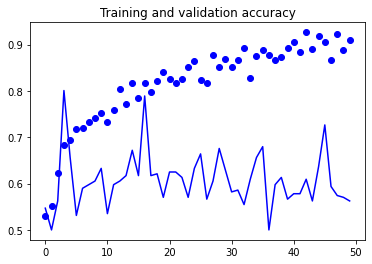

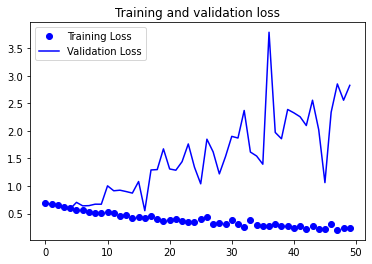

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()